In [7]:
import sys
import os
# TEMPORARY FIX for KMP_DUPLICATE_LIB_OK error
os.environ['KMP_DUPLICATE_LIB_OK']='True'
current_dir = os.getcwd()
ROOT = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(ROOT)

from modules.solver.origami import RigidFoldableStructure
from modules.solver.kinematics import Kinematics
from modules.solver.util import pattern_visualizer, load_rfs_artifact_npz

In [8]:
triresch_info = load_rfs_artifact_npz("../data/import/triResch/triResch_2orbit.npz") # "../data/import/triResch/triResch_4orbit.npz"
triresch_pattern = RigidFoldableStructure(
    vert=triresch_info["V"], edge=triresch_info["E"], face=triresch_info["F"], connection = triresch_info["C"])

[*] Loaded artifact <- ../data/import/triResch/triResch_2orbit.npz
[*] Sheet Signs Generated: [1]


In [9]:
# Pattern visualization, too many vertices so skip
# pattern_visualizer(triresch_pattern, show_vertices = True, show_edges = True, show_faces = True)

In [10]:
kinematics = Kinematics(triresch_pattern, k_raw = triresch_info["k_stiffness_raw"], 
                        theta_init_raw = triresch_info["theta_init_raw"], 
                        theta_equil_raw = triresch_info["theta_neutral_raw"], 
                        face_colors = triresch_info["face_colors"], reference_frame= triresch_info["reference_frame"])

kinematics.MAX_ITERATION = 1000
kinematics.step_size_threshold = 1e-7
kinematics.residual_threshold = 1e-5
kinematics.max_diff_threshold = 1e-6

kinematics.fps = 30
kinematics.play_speed = 2.0
kinematics.num_interp_frames = 200

angle_history_raw = kinematics._find_equilibrium_trajectory()


Processed iteration 220/1000, c = 2.727e-04, max_diff(deg) = 0.00, dof = 2111
Converged: Max difference to target equilibrium (2.80e-07) is less than tolerance max_diff_threshold (1.00e-06).

Converged to equilibrium angles.


Processing 228 iterations and interpolating to 200 frames.
Exporting results... | fps: 30, play_speed: 2.0


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyvista\jupyter\notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


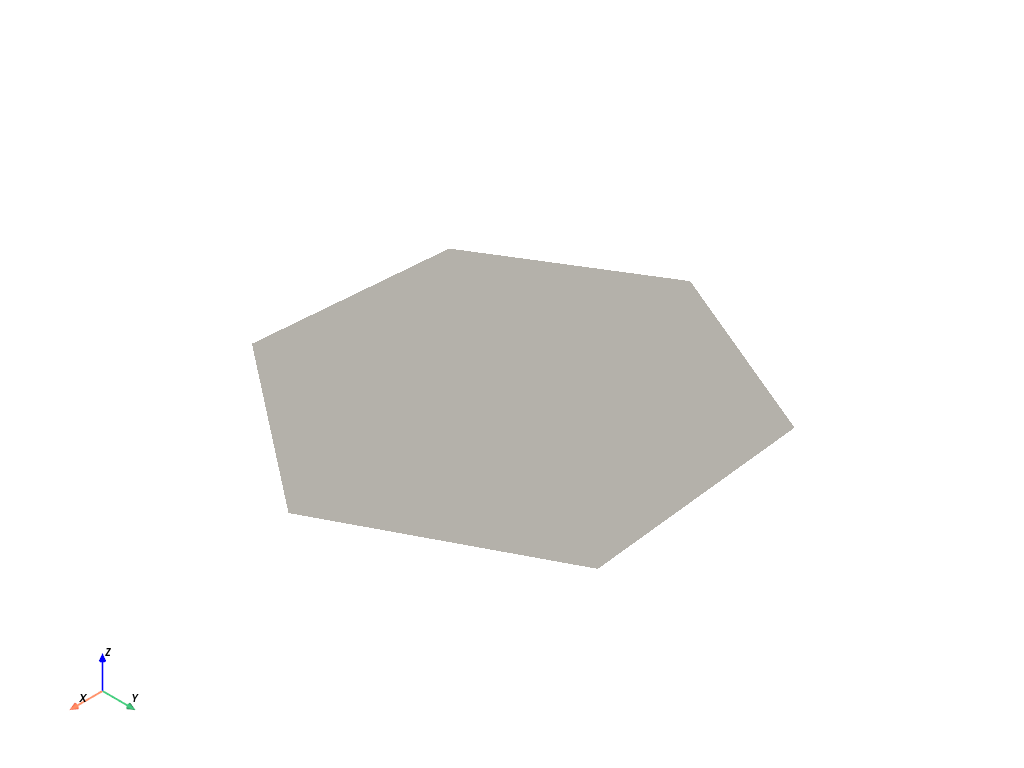

Done.


In [ ]:
ply_path = '../data/visualization_result/triResch/triResch_2orbit.vtp'
npy_path = '../data/visualization_result/triResch/triResch_2orbit.npy'
gif_path = None # '../data/visualization_result/triResch/triResch_4orbit.gif'
vtk_path = None # '../data/visualization_result/triResch/triResch_4orbit_vtk'

kinematics.export_trajectory(ply_path=ply_path, npy_path=npy_path, gif_path=gif_path, vtk_path = vtk_path, show_base=True)